# Basics

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import pytz


In [2]:
# Adjusting the start and end times
frequency = "1h"
start_time = (datetime.now(pytz.timezone('UTC')) - timedelta(days=700)).strftime('%Y-%m-%d')  # 5 days ago from the current date
end_time = (datetime.now(pytz.timezone('UTC'))).strftime('%Y-%m-%d')  # Current date in UTC

In [3]:
# Define your tickers, start time, end time, and frequency
tickers = ["BTC-CAD"]

# Initialize an empty DataFrame for combined data
combined_data = pd.DataFrame()

# Retrieve historical data for each ticker
for ticker in tickers:
    # Download historical data for the ticker
    data = yf.download(ticker, start=start_time, end=end_time, interval=frequency)[['High', 'Low', 'Open', 'Close']]
    
    # Check if the index is already timezone-aware and convert timezone if necessary
    if data.index.tz is None:
        # If the index is not timezone-aware, localize to UTC first then convert to Pacific Time
        data.index = data.index.tz_localize('UTC').tz_convert('US/Pacific')
    else:
        # If the index is already timezone-aware, directly convert to Pacific Time
        data.index = data.index.tz_convert('US/Pacific')
    
    # Combine data for each ticker into a single DataFrame with unique column names
    for col in data.columns:
        combined_column_name = f"{ticker}_{col}"  # Create a unique column name
        combined_data[combined_column_name] = data[col]

[*********************100%%**********************]  1 of 1 completed


### Current Open

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'combined_data' is your DataFrame

# Convert the index to a datetime index if it's not already
combined_data.index = pd.to_datetime(combined_data.index)

# Extract the date from the datetime index
combined_data['date'] = combined_data.index.date

# Extract the first 'BTC-CAD_Open' of each day
first_values_daily = combined_data.groupby('date')['BTC-CAD_Open'].first()

# Map these first opening values back onto the combined_data DataFrame
# This directly uses the current day's date to fetch the opening price
combined_data['current_day_open'] = combined_data['date'].apply(lambda x: first_values_daily.get(x, np.nan))

# Calculate percent change for each minute against the current day's opening price
combined_data['percent_change_high'] = (combined_data['BTC-CAD_High'] - combined_data['current_day_open']) / combined_data['current_day_open'] * 100
combined_data['percent_change_low'] = (combined_data['BTC-CAD_Low'] - combined_data['current_day_open']) / combined_data['current_day_open'] * 100

# Drop rows where 'percent_change' is NaN (i.e., potentially the first entries if the opening price is not available)
combined_data.dropna(subset=['percent_change_high'], inplace=True)
combined_data.dropna(subset=['percent_change_low'], inplace=True)

# The DataFrame 'combined_data' now contains the additional columns 'current_day_open' and 'percent_change',
# which represent the opening price of BTC-CAD for the current day and the percent change of the high price
# from the opening price for each entry, respectively.


In [5]:
combined_data

,BTC-CAD_High,BTC-CAD_Low,BTC-CAD_Open,BTC-CAD_Close,date,current_day_open,percent_change_high,percent_change_low
Datetime,,,,,,,,
2022-03-12 16:00:00-08:00,49631.058594,49464.855469,49583.980469,49599.464844,2022-03-12,49583.980469,0.094946,-0.240249
2022-03-12 17:00:00-08:00,49908.410156,49597.933594,49616.261719,49739.457031,2022-03-12,49583.980469,0.654303,0.028140
2022-03-12 18:00:00-08:00,49907.957031,49727.707031,49738.140625,49903.250000,2022-03-12,49583.980469,0.653390,0.289865
2022-03-12 19:00:00-08:00,49960.164062,49897.320312,49897.839844,49939.488281,2022-03-12,49583.980469,0.758680,0.631938
2022-03-12 20:00:00-08:00,49973.140625,49902.167969,49942.960938,49902.167969,2022-03-12,49583.980469,0.784851,0.641714
...,...,...,...,...,...,...,...,...
2024-02-10 11:00:00-08:00,64282.195312,63854.152344,63878.746094,64095.539062,2024-02-10,63678.890625,0.947417,0.275227
2024-02-10 12:00:00-08:00,64941.960938,64020.707031,64020.707031,64597.273438,2024-02-10,63678.890625,1.983499,0.536781
2024-02-10 13:00:00-08:00,64912.277344,64490.855469,64697.640625,64678.800781,2024-02-10,63678.890625,1.936885,1.275093


## Wasserstein

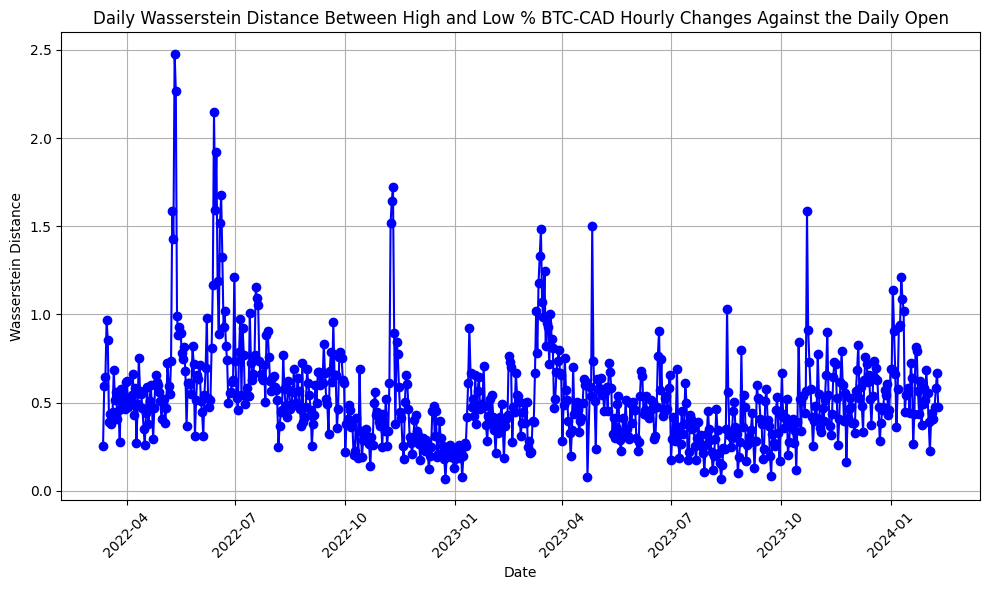

In [6]:
import pandas as pd
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt

# Assuming 'combined_data' is already defined and contains 'percent_change_high' and 'percent_change_low' columns

# Group by 'date' and calculate Wasserstein distance for each group
def calculate_wasserstein(group):
    high_changes = group['percent_change_high'].values
    low_changes = group['percent_change_low'].values
    return wasserstein_distance(high_changes, low_changes)

# Apply the function to each group and reset the index to get a DataFrame
wasserstein_distances = combined_data.groupby('date').apply(calculate_wasserstein).reset_index(name='wasserstein_distance')

# Rename the columns for clarity
wasserstein_distances.columns = ['Date', 'Wasserstein_Distance']

# Convert 'Date' column to datetime type if it's not already
wasserstein_distances['Date'] = pd.to_datetime(wasserstein_distances['Date'])

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(wasserstein_distances['Date'], wasserstein_distances['Wasserstein_Distance'], marker='o', linestyle='-', color='blue')

plt.title('Daily Wasserstein Distance Between High and Low % BTC-CAD Hourly Changes Against the Daily Open')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Wasserstein Distance')  # Y-axis label
plt.grid(True)  # Show grid
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()


In [7]:
import pandas as pd

# Load the historical Wasserstein distances from the Parquet file
wass_dist_hist = pd.read_parquet('wass_dist_complete.parquet')

# Assuming 'wasserstein_distances' is calculated as per your provided code snippet

# Append the new distances to the historical DataFrame
wass_dist_complete = pd.concat([wass_dist_hist, wasserstein_distances], ignore_index=True)

# It's a good practice to sort the DataFrame by date if it's not already sorted
wass_dist_complete.sort_values(by='Date', inplace=True)

# Export the combined DataFrame to a new Parquet file
wass_dist_complete.to_parquet('wass_dist_complete.parquet', engine='pyarrow')


In [8]:
test = pd.read_parquet('wass_dist_complete.parquet')
test

,Date,Wasserstein_Distance
0,2018-05-15,1.180985
1,2018-05-16,1.282229
2,2018-05-17,1.024475
3,2018-05-18,0.977606
4,2018-05-19,0.744632
...,...,...
2782,2024-02-08,0.583208
2783,2024-02-09,0.668669
2084,2024-02-09,0.668669
2085,2024-02-10,0.476447
